In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
kwf2 = dl.load_kelmarsh_data(from_raw=False)

In [3]:
#####################################################
####### See run.py for details on parameters ########
#####################################################

dataset_name = "kwf"

# Each shift creates a model for a specific time horizon
# e.g. shift = 6 means target column gets shiftet by 6 * 10 min
shifts = [1,6,144]

# Each model (potentially) works with a different ML algorithm
# Options: "xgboost", "xgboost_HPO", "linreg", "rf"
models_names = ["xgboost1", "xgboost2", "xgboost2"] 

# Choice of columns based on potential physical influence on power
col_to_be_lagged = ["Wind speed (m/s)", 'Long Term Wind (m/s)', 
                   'Density adjusted wind speed (m/s)',
                   'Wind direction (°)', "power"]

# "Sensful" choices 
non_nan_percentage = 90
val_ratio=0.2
scalers = [MinMaxScaler(), MinMaxScaler(), MinMaxScaler()]

## Run models

In [4]:
models = run.pipeline(
    kwf2,
    models_names,
    dataset_name,
    shifts,
    non_nan_percentage, 
    col_to_be_lagged,
    val_ratio, scalers)

Finished training on kwf for 10min horizon
Finished training on kwf for 1 hour horizon
Finished training on kwf for 1 day horizon


## Plot results

In [5]:
visualizations.plot_metrics("Kelmarsh",models)

| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.219 |          145.603 |  89.3621 |         91.5538 |
| Kelmarsh 1 hour horizon | 247.4   |          263.749 | 169.839  |        183.286  |
| Kelmarsh 1 day horizon  | 596.683 |          623.023 | 476.414  |        510.71   |


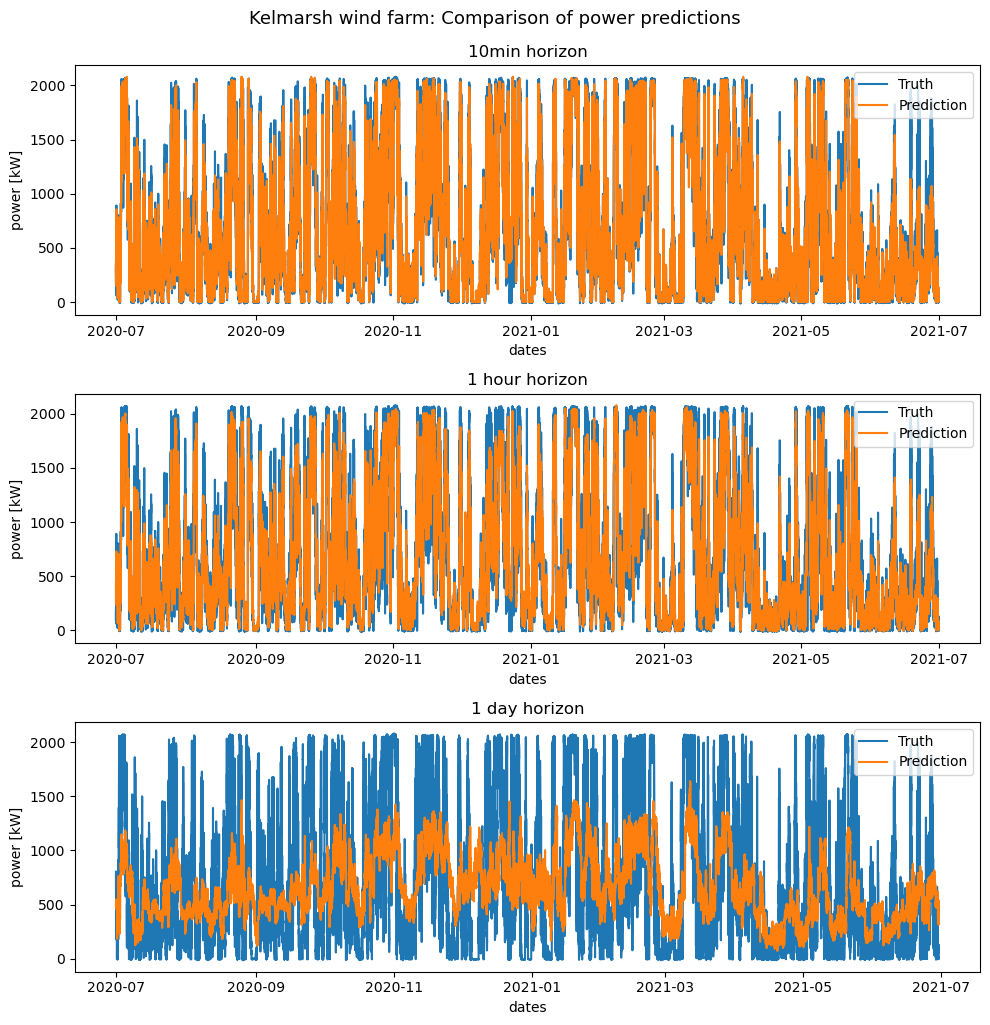

In [6]:
visualizations.plot_models("Kelmarsh",models)
